In [6]:
#libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

## Q1 : Linear Regression

[Dataset: communities.zip]

For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

## 1a.

Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

### Load the data

In [51]:
community = pd.read_csv('communities/communities.csv',na_values='?')

In [52]:
community.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [53]:
community.shape

(1994, 100)

### preprocessing

#### Drop identifier

In [54]:
#drop identifier
num_community = community.drop(['state','communityname'], axis=1, inplace = False)
num_community.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [55]:
num_community.shape

(1994, 98)

#### missing values?

In [56]:
#check for missing values
print "attribute with missing values: \n"
print [col for col in num_community.columns if num_community[col].isnull().any()]

attribute with missing values: 

['OtherPerCap']


In [58]:
#check data type
num_community.OtherPerCap.dtype

dtype('float64')

In [59]:
#fill in missing value
OtherPerCap_mean = num_community.OtherPerCap.mean()
num_community.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

In [60]:
#check for missing values again
print "attribute with missing values: \n"
print [col for col in num_community.columns if num_community[col].isnull().any()]

attribute with missing values: 

[]


### basic statistics

In [61]:
#summary
num_community.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


### Separate the target attribute for regression

In [68]:
y=num_community['ViolentCrimesPerPop']
x=num_community.drop('ViolentCrimesPerPop',axis=1)

In [69]:
y.shape,x.shape

((1994,), (1994, 97))

## 1b.

Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

### standard linear regression (MLA) 

In [80]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [82]:
X= np.array([np.concatenate((v,[1])) for v in np.array(x)])
Y= np.array(y)
print "Train: ", '\n',X,'\n\n\n' , "Target: ",'\n',Y

Train:  
[[ 0.19  0.33  0.02 ...,  0.26  0.2   1.  ]
 [ 0.    0.16  0.12 ...,  0.12  0.45  1.  ]
 [ 0.    0.42  0.49 ...,  0.21  0.02  1.  ]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.32  0.18  1.  ]
 [ 0.08  0.51  0.06 ...,  0.38  0.33  1.  ]
 [ 0.2   0.78  0.14 ...,  0.3   0.05  1.  ]] 


Target:  
[ 0.2   0.67  0.43 ...,  0.23  0.19  0.48]


In [83]:
#coefficient
w = standRegres(X,Y)

In [91]:
#prediction
xMat=np.mat(X)
yMat=np.mat(Y)
yHat = xMat*w
print yHat[0:10]

[[ 0.16551838]
 [ 0.29062973]
 [ 0.38367799]
 [ 0.32270857]
 [-0.02129155]
 [ 0.23017938]
 [ 0.08800201]
 [ 0.4423392 ]
 [ 0.23747971]
 [ 0.00526097]]


In [94]:
#actual
print yMat.T[0:10]

[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 [ 0.12]
 [ 0.03]
 [ 0.14]
 [ 0.03]
 [ 0.55]
 [ 0.53]
 [ 0.15]]


### RMSE 

In [107]:
# Now we can constuct a vector of errors
err = abs(yHat-yMat.T)

# Let's see the error on the first 10 predictions
print err[:10]

[[ 0.03448162]
 [ 0.37937027]
 [ 0.04632201]
 [ 0.20270857]
 [ 0.05129155]
 [ 0.09017938]
 [ 0.05800201]
 [ 0.1076608 ]
 [ 0.29252029]
 [ 0.14473903]]


In [111]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err.T,err)
print total_error 

[[ 33.12538681]]


In [112]:
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print "The RMSE : %0.4f" % rmse_train

The RMSE : 0.1289


### correlation between y and x

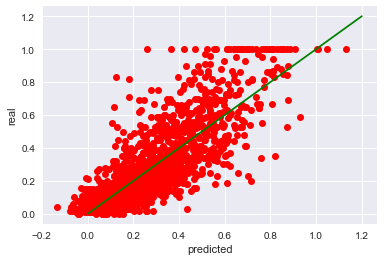

In [116]:
# Plot outputs
import pylab as pl
%matplotlib inline
pl.plot(yHat.T, yMat,'ro')
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Highly correlated between predicted and real value

### regression coefficients (weights)

In [90]:
print w.T

[[  1.31108068e-01  -3.14114977e-02   2.09909670e-01  -4.05351612e-02
   -1.38892919e-02   5.89726825e-02   1.23399025e-01  -2.22621600e-01
   -1.47500199e-01   5.01635477e-02  -2.42413829e-01   4.64024392e-02
   -1.96945615e-01  -2.06117500e-01   4.65935490e-02  -1.77212915e-01
    6.30148504e-02   1.14942190e-02  -9.08951848e-02   2.74640044e-01
    1.01752476e-01  -3.31517562e-01  -2.91799268e-02  -3.54483393e-02
    2.26173855e-02   4.30950137e-02   3.44408548e-02   1.28412458e-01
   -1.91293360e-01  -1.00769002e-01   6.46856092e-02   1.06062117e-01
    2.44126002e-06   2.34984611e-01  -3.75705330e-02  -7.74957660e-03
    4.66779619e-01   2.26295907e-01   1.74621953e-01  -5.75206227e-01
   -1.41954207e-01   5.68782538e-02  -3.51066745e-01  -3.49493414e-02
    4.63705978e-04   5.57016681e-02  -1.82238360e-01  -1.54646442e-01
    1.26172899e-01  -1.44320569e-01   2.39071713e-02   3.33390229e-02
   -7.42297409e-02   3.59876412e-02  -3.31691535e-02  -2.18174916e-01
    4.45777391e-01  

### 10-fold cross-validation and comapre

In [133]:
from sklearn.cross_validation import KFold
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(X), n_folds=10)
xval_err = 0
for train,test in kf:
    w=standRegres(X[train],Y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = (np.mat(X[test])*w).T
    e = abs(p-np.mat(Y[test]))
    xval_err += np.dot(e,e.T)
    
rmse_10cv = np.sqrt(xval_err/len(X))

In [134]:
method_name = 'MLA'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: MLA
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


## 1c.


Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

###  linear regression (scikit-learn regression model ) 

In [141]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import cross_validation

In [188]:
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
#prediction
print linreg.predict(X[:10])

[ 0.16551838  0.29062973  0.38367799  0.32270857 -0.02129155  0.23017938
  0.08800201  0.4423392   0.23747971  0.00526097]


### feature selection

In [191]:
linreg = LinearRegression()
def optimal_percentage (train,target,model):   
    
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(train, target)
        scores = abs(cross_validation.cross_val_score(model, X_train_fs, target, cv=5, scoring='neg_mean_absolute_error'))
        results = np.append(results, scores.mean())

    optimal_percentil = np.where(results == results.min())[0]
    return percentiles[optimal_percentil],results

In [194]:
print "optimal_percentile to use: ", optimal_percentage(X,Y,linreg)[0]

optimal_percentile to use:  36


/Users/jasonwu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


### the list of most informative variables and their weights 

In [198]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=36)
X_train_fs = fs.fit_transform(X, Y)
for i in range(len(x.columns.values)):
    if fs.get_support()[i]:
        print x.columns.values[i],'\t', fs.scores_[i] 

population 	310.369918779
racepctblack 	1319.68643314
racePctWhite 	1758.77227347
numbUrban 	302.12358082
medIncome 	437.1590743
pctWInvInc 	990.700974651
pctWPubAsst 	982.200467892
medFamInc 	475.837601763
perCapInc 	281.878264885
NumUnderPov 	499.025448645
PctPopUnderPov 	745.599159432
PctLess9thGrade 	405.110531951
PctNotHSGrad 	607.30932519
PctUnemployed 	679.145660493
MalePctDivorce 	759.581937457
FemalePctDiv 	891.494024673
TotalPctDiv 	876.510085951
PctFam2Par 	1987.05731023
PctKids2Par 	2388.61868809
PctYoungKids2Par 	1588.37986036
PctTeen2Par 	1550.53163637
NumIlleg 	567.975360335
PctIlleg 	2381.98320035
PctLargHouseFam 	343.442480513
PctPersOwnOccup 	759.916937383
PctPersDenseHous 	514.036224481
PctHousLess3BR 	578.789197875
MedNumBR 	291.680471184
HousVacant 	430.103642138
PctHousOwnOcc 	566.905240411
PctVacantBoarded 	605.507916549
PctHousNoPhone 	623.483263567
PctWOFullPlumb 	305.118590384
NumInShelters 	327.491789621
NumStreet 	260.854152995


### plot

/Users/jasonwu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


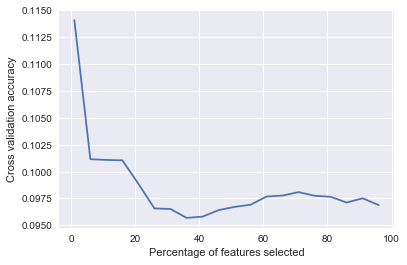

In [195]:
# Plot percentile of features VS. cross-validation scores
import pylab as pl
percentiles = range(1, 100, 5)
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,optimal_percentage(X,Y,linreg)[1])

## 1d.

Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]


### 20%-80% randomized split of the data.

In [214]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

### Function

In [215]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_absolute_error

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print param_name, ' = ', param_value
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=50)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = mean_absolute_error(clf.predict(X[train]), y[train])
            k_test_scores[j] = mean_absolute_error(clf.predict(X[test]), y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Absolute Error")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [216]:
alpha = np.linspace(0.0001, 200,500)
alpha = np.array([float(e) for e in alpha])
param_values = alpha

In [217]:
from sklearn.linear_model import Lasso, Ridge

ridreg = Ridge()
lasreg = Lasso()

### Ridge Regression

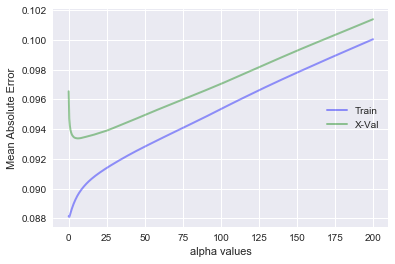

In [223]:
train_scores, test_scores = calc_params(X_train, y_train,ridreg,alpha,'alpha', 5)

In [225]:
min_err_id = np.where(test_scores == test_scores.min())
min_alpha = alpha[min_err_id]
print 'best alpha :',min_alpha

best alpha : [ 6.01212104]


### Fit model with tesing set and calulate MAE

In [226]:
ridreg = Ridge(alpha=6.01212104)
ridreg.fit(X_train, y_train)  
MAE = mean_absolute_error(ridreg.predict(X_test), y_test)
print 'MAE(ridreg) : ',MAE 

MAE(ridreg) :  0.103039559305


### Lasso Regression

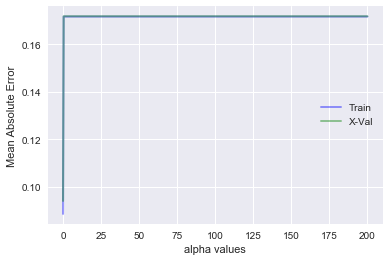

In [227]:
train_scores, test_scores = calc_params(X_train, y_train,lasreg,alpha,'alpha', 5)

In [228]:
min_err_id = np.where(test_scores == test_scores.min())
min_alpha = alpha[min_err_id]
print 'best alpha :',min_alpha

best alpha : [ 0.0001]


### Fit model with tesing set and calulate MAE

In [230]:
lasreg = Lasso(alpha=0.0001)
lasreg .fit(X_train, y_train)  
MAE = mean_absolute_error(lasreg.predict(X_test), y_test)
print 'MAE(lasreg) : ',MAE 

MAE(lasreg) :  0.102337251908


### observation and conclusions

comparing MAE on testing set between using lasso regression and Ridge Regression, we can see that lasso regression has slightly lower mean absolute error. Therefore, lasso regression is a better model 

## 1e.

Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

### standardized and randomized 80%-20% train-test split

In [232]:
from sklearn import preprocessing

In [237]:
scaler = preprocessing.StandardScaler()
x_std = scaler.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_std, Y, test_size=0.2, random_state=50)

### Stochastic Gradient Descent for regression

In [238]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
sgdreg = SGDRegressor()
par = {'penalty': ['l1', 'l2'],'alpha': np.linspace(0.0001,200, 400)}

### grid search (with  penalty parameters ('l2', 'l1') and different values of alpha)

In [239]:
from sklearn.grid_search import GridSearchCV

/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [241]:
gs = GridSearchCV(sgdreg, par, verbose=1, cv=5)

In [242]:
%time _ = gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
CPU times: user 1min 13s, sys: 806 ms, total: 1min 14s
Wall time: 39 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   39.0s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6373769856423661)

### Using the best parameters, apply the model to the set-aside test data.

In [244]:
sgdreg = SGDRegressor(alpha= 0.0001, penalty='l1')
sgdreg .fit(X_train, y_train)  
MAE = mean_absolute_error(sgdreg.predict(X_test), y_test)
print 'MAE(sgdreg) : ',MAE 

MAE(sgdreg) :  0.105297231031


### model selectionto find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. 

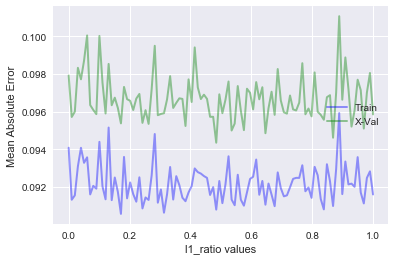

In [246]:
l1_ratio_range = np.linspace(0.0001,0.9999, 100)

sgdreg = SGDRegressor(penalty='elasticnet')

train_scores, test_scores = calc_params(X_train, y_train,sgdreg,l1_ratio_range,'l1_ratio', 5)

In [248]:
min_err_id = np.where(test_scores == test_scores.min())
min_l1_ratio = l1_ratio_range[min_err_id]
print 'best l1_ratio :',min_l1_ratio

best l1_ratio : [ 0.48485152]


In [249]:
sgdreg = SGDRegressor(alpha= 0.0001, penalty='l1', l1_ratio = 0.48485152 )
sgdreg .fit(X_train, y_train)  
MAE = mean_absolute_error(sgdreg.predict(X_test), y_test)
print 'MAE(sgdreg) : ',MAE 

MAE(sgdreg) :  0.103703787286


### Summary

Using grid search for Stochastic Gradient Descent regression, we can see that MAE  =  0.105297231031 with the setting "alpha= 0.0001, penalty='l1'" is the suggested model that minimize the MAE. 

Furthermore, I use the function created on d to find the best l1_ratio and fit the SGDRegressor with setting"alpha= 0.0001, penalty='l1', l1_ratio = 0.48485152" , the value of MAE beocome slightly lower(MAE = 0.103703787286)

Therefore, the later model have slightly better performance on prediciton 

## Q2 : Automatic Document Clustering 

[Dataset: newsgroups5.zip]

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]



## 2a.

Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [319]:
def cosine_dis(instance,Train):
    Train_norm = np.linalg.norm(Train)
    instance_norm = np.linalg.norm(instance)
    sims = np.dot(Train,instance)/(Train_norm * instance_norm)
    dists = 1 - sims
    return dists

## 2b.

Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

### Load data and transpose the row-doc matrix to doc-row matrix

In [291]:
#load data and transpose the matrix
mat = pd.read_csv('newsgroups5/matrix.txt',header=None)
doc_term = mat.T
term = pd.read_table('newsgroups5/terms.txt',header=None)
cls = pd.read_table('newsgroups5/classes.txt',skiprows=1,sep=' ',header=None)
cls.drop(0, axis=1, inplace=True)

In [282]:
mat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
doc_term.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
term.head(5)

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [292]:
cls.head(5)

,1
0,0
1,1
2,1
3,1
4,2


In [296]:
print 'term:', term.shape, '\n','cls:',cls.shape, '\n','doc_term:',doc_term.shape

term: (9328, 1) 
cls: (2500, 1) 
doc_term: (2500, 9328)


### split the "doc_term" data set (80-20)

In [350]:
from sklearn.cross_validation import train_test_split
DT_train, DT_test,cls_train,cls_test = train_test_split(doc_term, cls, test_size=0.2, random_state=33)

print "DT_train:",DT_train.shape
print "DT_test: ",DT_test.shape

print "cls_train:",cls_train.shape
print "cls_test: ",cls_test.shape

DT_train: (2000, 9328)
DT_test:  (500, 9328)
cls_train: (2000, 1)
cls_test:  (500, 1)


## 2c.

As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [308]:
from sklearn.feature_extraction.text import TfidfTransformer
DTTrain_TFIDF = TfidfTransformer().fit_transform(DT_train).toarray()
DTTest_TFIDF = TfidfTransformer().fit_transform(DT_test).toarray()
print DTTrain_TFIDF,"\n",DTTrain_TFIDF.shape
print '\n\n\n'
print DTTest_TFIDF,"\n",DTTest_TFIDF.shape

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 
(2000, 9328)




[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 
(500, 9328)


## 2d.

Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

### Kmeans clustering

In [309]:
import kMeans
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [320]:
centroids, clusters = kMeans.kMeans(DTTrain_TFIDF , 5, distMeas= cosine_dis)

In [321]:
print centroids

[[  0.00000000e+00   7.95806525e-04   1.46274214e-04 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.76890328e-04   0.00000000e+00   4.80302813e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.05956793e-04   0.00000000e+00   1.32574824e-03 ...,   3.22566353e-07
    0.00000000e+00   0.00000000e+00]
 [  4.13830617e-04   0.00000000e+00   1.70948093e-04 ...,   1.21827029e-04
    6.42053971e-05   3.85065889e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [322]:
print clusters

[[ 2.          0.74555211]
 [ 3.          0.88944344]
 [ 2.          0.68745882]
 ..., 
 [ 1.          0.31748329]
 [ 3.          0.49793166]
 [ 4.          0.55067996]]


In [328]:
DTTrain_TFIDF[clusters[:,0]==2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Top term funcion

In [383]:
def topterm(data, k, N):
    centroids, clusters = kMeans.kMeans(data , k, distMeas= cosine_dis)
    for i in range(k):
        
        N_cluster = data[clusters[:,0]==i]
        print 'cluster',i+1, '( size = ', N_cluster.shape[0],')',"\n"
        
        cluster_DF = np.array([(N_cluster.T!=0).sum(1)]).T
        term_doc_pc_cluster = cluster_DF/float(N_cluster.shape[0])
        term_doc_pc_cluster = map(list, term_doc_pc_cluster)
        term_doc_pc_cluster = [elem[0] for elem in term_doc_pc_cluster]
        cluster_DF = [elem[0] for elem in cluster_DF]
        a=sorted(zip(np.array(term), cluster_DF, term_doc_pc_cluster),key=lambda x:x[2],reverse=True)
        for elem in a[:N]:
            print '  term: ',elem[0]
            print '  cluster DF: ',elem[1]
            print '  percentage of docs in the cluster where the term appears: ',elem[2],'\n'
        print '\n'
    return  centroids, clusters

### Run function

In [384]:
centroids, clusters = topterm(DTTrain_TFIDF, 5, 5)

cluster 1 ( size =  734 ) 

  term:  ['subject']
  cluster DF:  734
  percentage of docs in the cluster where the term appears:  1.0 

  term:  ['write']
  cluster DF:  432
  percentage of docs in the cluster where the term appears:  0.588555858311 

  term:  ['articl']
  cluster DF:  317
  percentage of docs in the cluster where the term appears:  0.431880108992 

  term:  ['on']
  cluster DF:  289
  percentage of docs in the cluster where the term appears:  0.393732970027 

  term:  ['window']
  cluster DF:  266
  percentage of docs in the cluster where the term appears:  0.362397820163 



cluster 2 ( size =  415 ) 

  term:  ['subject']
  cluster DF:  415
  percentage of docs in the cluster where the term appears:  1.0 

  term:  ['sale']
  cluster DF:  220
  percentage of docs in the cluster where the term appears:  0.530120481928 

  term:  ['email']
  cluster DF:  165
  percentage of docs in the cluster where the term appears:  0.397590361446 

  term:  ['pleas']
  cluster DF:  

## 2e.

Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [365]:
from sklearn.metrics import completeness_score, homogeneity_score
print 'completeness_score = ', completeness_score(np.array(cls_train.T)[0],clusters[:,0])
print 'homogeneity_score = ', homogeneity_score(np.array(cls_train.T)[0],clusters[:,0])

completeness_score =  0.721492789454
homogeneity_score =  0.666354683788


## 2f.

Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [377]:
rst = []

for doc in DTTest_TFIDF:
    
    dic = {}
    sim = []
    for i in range(len(centroids)):
        cluster=i+1
        centroid_doc_sim = 1 - cosine_dis(doc, centroids[i])
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = centroid_doc_sim
    dic['Obtained cluster label'] = sim.index(max(sim))+1
    rst.append(dic)

Q2f = pd.DataFrame(rst)
Q2f.head(5)

,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Obtained cluster label
0,0.046924,0.122056,0.037691,0.061158,0.039600,2
1,0.060610,0.141809,0.068824,0.103608,0.073697,2
2,0.021052,0.038993,0.023809,0.033157,0.114244,5
3,0.313920,0.150962,0.163128,0.132388,0.100200,1
4,0.028963,0.093863,0.045280,0.026601,0.216344,5


In [378]:
#Write to csv
Q2f.to_csv("HW3_2f_YUEHCHAO_WU.csv")